# Google Cloud Platform - ETL 
In this project, I'll create an end to end Extract, Load, and Transform process using cab rides data in New York, 2023 dataset, whcih is  available [here](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).
To avoide losing the data and better consistency, I used the csv offline file(already downloaded, uber_data.csv) which you can find it in the dataset folder of this project.

Additionally, the data catalogue of this dataset is available [here](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

## Designing the Data Model
The first step, is to define a data model to better manage our data. To do so, I created the following chart on Lucid Charts(an online application to create diagrams and data models):

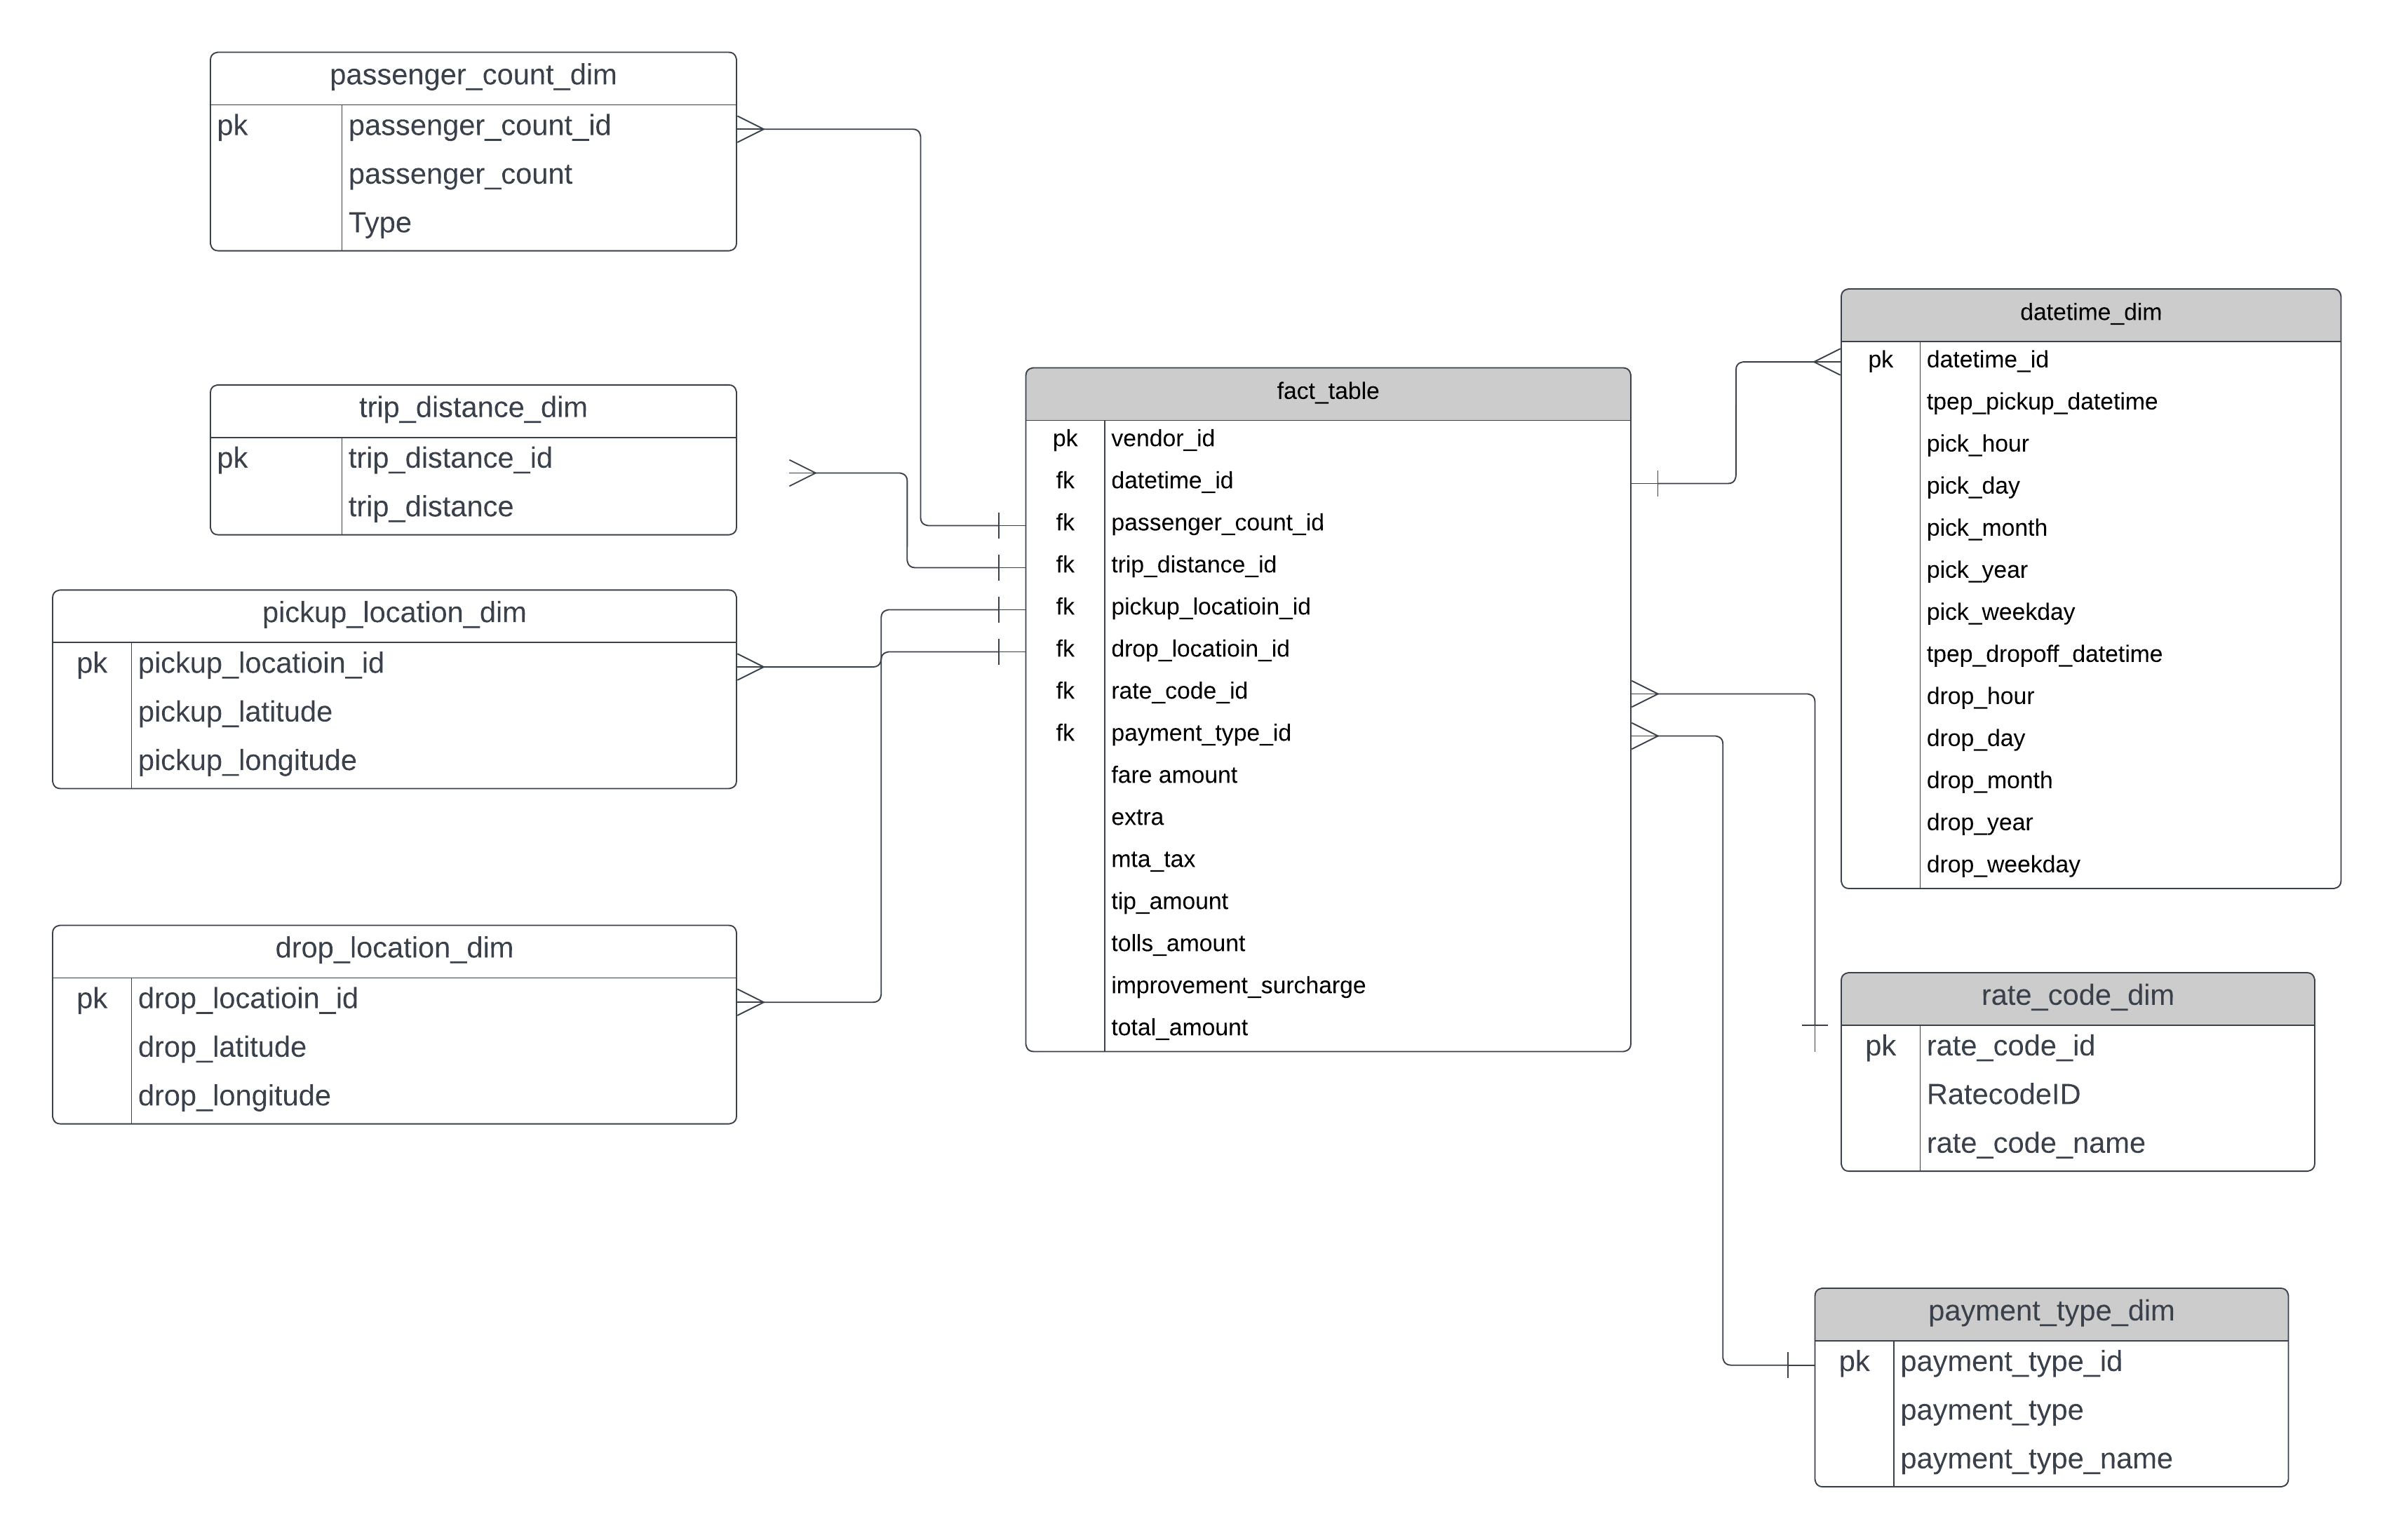


You can also access this document using this [link](https://lucid.app/lucidchart/620f4138-f22f-40c8-b739-7e93dd6004aa/edit?viewport_loc=-418%2C75%2C1835%2C808%2C0_0&invitationId=inv_bc41f21d-5619-4fe5-89cb-62d2d93be0ad)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("uber_data.csv")

In [6]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,5.92,-74.017197,40.705383,1,N,-73.978073,40.755787,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36
6,2,2016-03-01 00:00:00,2016-03-01 00:00:00,6,5.72,-73.994583,40.727848,1,N,0.000000,0.000000,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30
7,1,2016-03-01 00:00:01,2016-03-01 00:16:04,1,6.20,-73.788773,40.647758,1,N,-73.829208,40.712345,3,20.5,0.5,0.5,0.00,0.00,0.3,21.80
8,1,2016-03-01 00:00:01,2016-03-01 00:05:00,1,0.70,-73.958221,40.764641,1,N,-73.967896,40.762901,1,5.5,0.5,0.5,2.00,0.00,0.3,8.80
9,2,2016-03-01 00:00:01,2016-03-01 00:24:06,3,7.18,-73.985779,40.741192,1,N,-73.946350,40.797878,1,23.5,0.5,0.5,3.20,0.00,0.3,28.00


In [4]:
#checking data types
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [5]:
df.shape

(100000, 19)

In [23]:
#changing datatime columns into datatime type
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

In [24]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [25]:
#dropping duplicate columns
df = df.drop_duplicates().reset_index(drop=True)
df['trip_id'] = df.index

In [27]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,1
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,3
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,4


## Applying the data model:
In the following steps, I'll create the tables one by one(as pandas dataframes). 

The first table, is datetime_dim table, which is a dimension table:

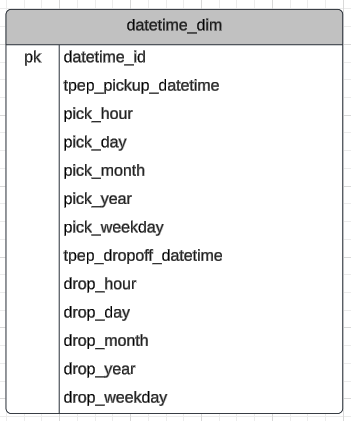

In [28]:
#extracting and transforming the pickup time data
datetime_dim = df[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop=True)
datetime_dim['tpep_pickup_datetime'] = datetime_dim['tpep_pickup_datetime']
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday


#extracting and transforming the drop time data
datetime_dim['tpep_dropoff_datetime'] = datetime_dim['tpep_dropoff_datetime']
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday

In [29]:
datetime_dim.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,2016-03-01,2016-03-01 00:07:55,0,1,3,2016,1,0,1,3,2016,1
1,2016-03-01,2016-03-01 00:11:06,0,1,3,2016,1,0,1,3,2016,1
2,2016-03-01,2016-03-01 00:31:06,0,1,3,2016,1,0,1,3,2016,1
3,2016-03-01,2016-03-01 00:00:00,0,1,3,2016,1,0,1,3,2016,1
4,2016-03-01,2016-03-01 00:00:00,0,1,3,2016,1,0,1,3,2016,1


In [30]:
#assigning the index of dataframe to a column:
datetime_dim['datetime_id'] = datetime_dim.index

#reordering the columns to use as our table:
datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
                             'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]
datetime_dim.head()

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2016-03-01,0,1,3,2016,1,2016-03-01 00:07:55,0,1,3,2016,1
1,1,2016-03-01,0,1,3,2016,1,2016-03-01 00:11:06,0,1,3,2016,1
2,2,2016-03-01,0,1,3,2016,1,2016-03-01 00:31:06,0,1,3,2016,1
3,3,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1
4,4,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1


In the next step, I'll create the passenger_count dataframe. This dataframe will be used as our passenger_count dimension table in our data model:
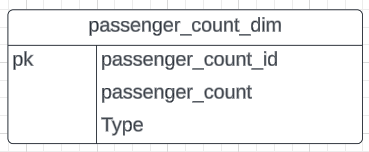

In [31]:
passenger_count_dim = df[['passenger_count']].reset_index(drop=True)
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index #creating the id column to be used as the primary key of the table
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']] #reordering the columns

passenger_count_dim.head()

,passenger_count_id,passenger_count
0,0,1
1,1,1
2,2,2
3,3,3
4,4,5


creating the trip distance dataframe:

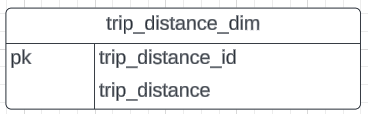

In [32]:
trip_distance_dim = df[['trip_distance']].reset_index(drop=True) 
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index #adjusting to be used as the primary key in the future table
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']] #reordering the columns

In [33]:
trip_distance_dim.head()

,trip_distance_id,trip_distance
0,0,2.50
1,1,2.90
2,2,19.98
3,3,10.78
4,4,30.43


Creating the rate code dataframe:

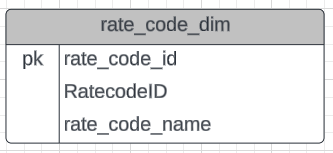

when creating this table, I add an extra column defining the rate code id's used in our dataframe, using the data catalouge provided [here](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

In [34]:
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code_dim = df[['RatecodeID']].reset_index(drop=True)
rate_code_dim['rate_code_id'] = rate_code_dim.index
rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

rate_code_dim.head()

,rate_code_id,RatecodeID,rate_code_name
0,0,1,Standard rate
1,1,1,Standard rate
2,2,1,Standard rate
3,3,1,Standard rate
4,4,3,Newark


creating the dropoff and pickup location dataframes:

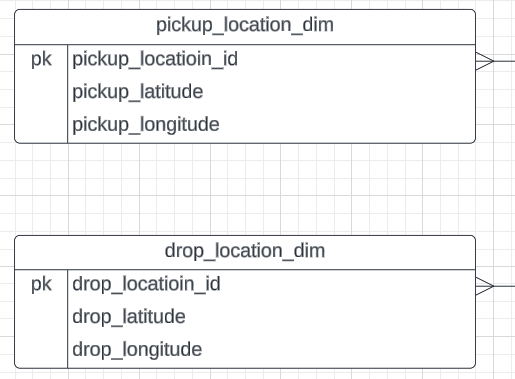

In [35]:
pickup_location_dim = df[['pickup_longitude', 'pickup_latitude']].reset_index(drop=True) #slicing the data
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index #setting the index as the id column(primary key in the future table)
pickup_location_dim = pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']] #reirdering the columns based on the defined table
print(pickup_location_dim.head())

dropoff_location_dim = df[['dropoff_longitude', 'dropoff_latitude']].reset_index(drop=True)
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id','dropoff_latitude','dropoff_longitude']]
print(dropoff_location_dim.head())

   pickup_location_id  pickup_latitude  pickup_longitude
0                   0        40.765152        -73.976746
1                   1        40.767925        -73.983482
2                   2        40.644810        -73.782021
3                   3        40.769814        -73.863419
4                   4        40.792183        -73.971741
   dropoff_location_id  dropoff_latitude  dropoff_longitude
0                    0         40.746128         -74.004265
1                    1         40.733166         -74.005943
2                    2         40.675770         -73.974541
3                    3         40.757767         -73.969650
4                    4         40.695053         -74.177170


creating the payment type dataframe:

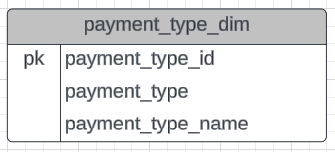

In [36]:
# creating a dictionary to define the payment type ids:
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}
payment_type_dim = df[['payment_type']].reset_index(drop=True) #slicning
payment_type_dim['payment_type_id'] = payment_type_dim.index # indexing
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name) #adding new data
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']] #reordering based on our columns
payment_type_dim.head()

,payment_type_id,payment_type,payment_type_name
0,0,1,Credit card
1,1,1,Credit card
2,2,1,Credit card
3,3,1,Credit card
4,4,1,Credit card


creating the fact table:

* the fact table is the biggest table in our data model, showing the transactional data. It has one primary key and multiple foreign keys in our designed data model:

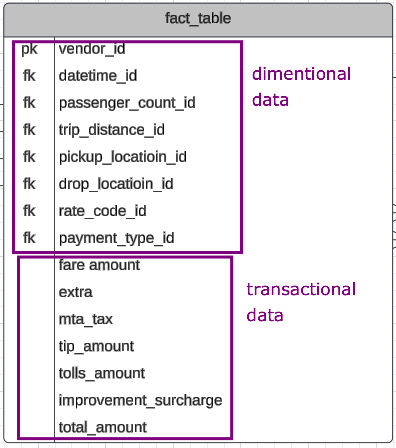

In [37]:
# merging the data to create the fact table(and reordering the columns to be aligned with our designed structure at the same time)
fact_table = df.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count_id') \
             .merge(trip_distance_dim, left_on='trip_id', right_on='trip_distance_id') \
             .merge(rate_code_dim, left_on='trip_id', right_on='rate_code_id') \
             .merge(pickup_location_dim, left_on='trip_id', right_on='pickup_location_id') \
             .merge(dropoff_location_dim, left_on='trip_id', right_on='dropoff_location_id')\
             .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
             .merge(payment_type_dim, left_on='trip_id', right_on='payment_type_id') \
             [['trip_id','VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

In [38]:
fact_table.head()

,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,1,1,1,1,N,1,1,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,2,2,2,2,N,2,2,2,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,3,3,3,3,N,3,3,3,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,4,2,4,4,4,4,N,4,4,4,98.0,0.0,0.0,0.00,15.50,0.3,113.80
